  <tr>
        <td>
            <div align="left">
                <font size=25px>
                    <b> Predicting whether the Patients have heart disease or not
                    </b>
                </font>
            </div>
        </td>
    </tr>

# Problem Statement :
Analyze the heart disease dataset to explore the machine learning algorithms and different models to predict the disease.

# Data Definition:
## Variable Description:

### Column	Description 
    1. age - Age of the patient
    2. gender -	Gender of the patient - (0,1) - (Male, Female)
    3. chest_pain -	It refers to the chest pain experienced by the patient -(0,1,2,3)
    4. rest_bps - Blood pressure of the patient while resting(in mm/Hg)
    5. cholesterol - Patient's cholesterol level (in mg/dl)
    6. fasting_blood_sugar - The blood sugar of the patient while fasting
    7. rest_ecg - Potassium level (0,1,2)
    8. thalach - The patient’s maximum heart rate
    9. exer_angina - It refers to exercise-induced angina - (1=Yes, 0=No)
    10. old_peak - It is the ST depression induced by exercise relative to rest(ST relates to the position on ECG plots)
    11. slope - It refers to the slope of the peak of the exercise ST-Segment- (0,1,2)
    12. ca - Number of major vessels - (0,1,2,3,4)
    13. thalassemia	- It refers to thalassemia which is a blood disorder - (0,1,2,3)
    
* 14. target - The patient has heart disease or not - (1=Yes, 0=No)


1. **[Import Packages](#import_packages)**
2. **[Loading Data](#Read_Data)**
3. **[Understand and Prepare the Data](#data_preparation)**
    - 3.1 - [Data Types and Dimensions](#Data_Types)
    - 3.2 - [Statistical Summary](#Statistical_Summary)
    - 3.3 - [Visualization](#Visualization)
    - 3.4 - [Outlier Handling](#Outlier_Handling)
    - 3.5 - [Correlation](#Correlation)
    - 3.6 - [Standardization](#Standardizing_Data)
 
4. **[Model Building](#Model_Building)**
    - 4.1 - [Decision Tree](#Decision_tree)
    - 4.2 - [Tuned Decision Tree](#Grid_Search_CV)
    - 4.3 - [Logistic Regression](#Logistic_regression)
    - 4.4 - [Tuned Logistic Regression](#Tuned_LR)
    - 4.5 - [Support Vector Machine](#SVM)
  
5. **[Model Comparision](#Model_comparision)**  
    

<a id='import_packages'></a>
## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='Read_Data'></a>
## Loading the Data

In [2]:
hd_df=pd.read_csv(r'C:\Users\HELLO\Documents\Python Scripts\Heart Disease.csv')

In [3]:
hd_df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<a id='data_preparation'></a>
## 3. Understand and Prepare the Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis. <br><br>
                        Here we will analyze and prepare data :<br>
                        1. Check dimensions and data types of the dataframe <br>
                        2. Study summary statistics<br> 
                        3. Check for missing values<br>
                        4. Study correlation<br>
                                       </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Data_Types'></a>
## 3.1 Data Types and Dimensions

In [4]:
hd_df.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [5]:
hd_df.shape

(303, 14)

In [6]:
hd_df.dtypes

age                      int64
gender                   int64
chest_pain               int64
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar      int64
rest_ecg                 int64
thalach                  int64
exer_angina              int64
old_peak               float64
slope                    int64
ca                       int64
thalassemia              int64
target                   int64
dtype: object

In [7]:
hd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


* The data types are in numeric form hence there is no need to change from categorical to numerical data.

<a id='Statistical_Summary'></a>
## 3.2 Statistical Summary
Here we take a look at the summary of each attribute. This includes the count, mean, the min and max values as well as some percentiles for numeric variables.

In [8]:
hd_df.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


* The count for all variables is equal meaning no missing values to deal with.
* The maximmum values in cholesterol and old peak are very high.

<a id='Visualization'></a>
## 3.3. Visualization


In [9]:
hd_df['target'].unique()

array([1, 0], dtype=int64)

Number of Patients with heart disease :  165
Number of Patients not with heart disease  :  138


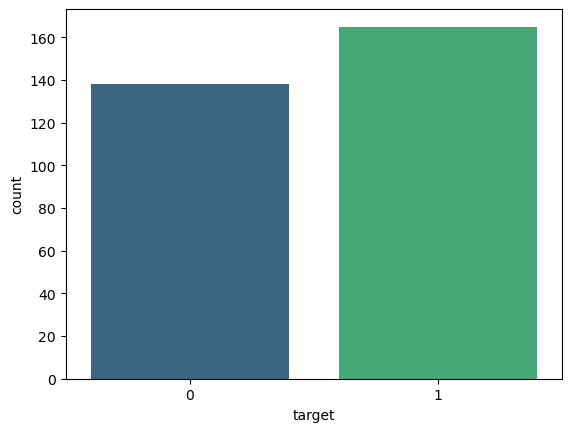

In [10]:
sns.countplot(x=hd_df['target'],data=hd_df,palette="viridis")
S, N = hd_df['target'].value_counts()
print('Number of Patients with heart disease : ',S)
print('Number of Patients not with heart disease  : ',N)

* We see that patients with heart disease are comparatively more as well as the data is balanced

In [11]:
def plot_bar(column):
    # temp df 
    temp_1 = pd.DataFrame()
    # count categorical values
    temp_1['No_heart_disease'] = hd_df[hd_df['target'] == 0][column].value_counts()
    temp_1['Heart_disease'] = hd_df[hd_df['target'] == 1][column].value_counts()
    temp_1.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of patients')
    plt.title('Distribution of {} and deposit'.format(column))
    plt.show()

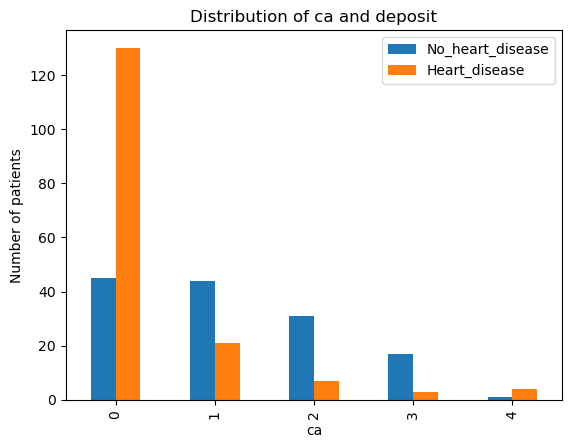

In [12]:
plot_bar('ca')

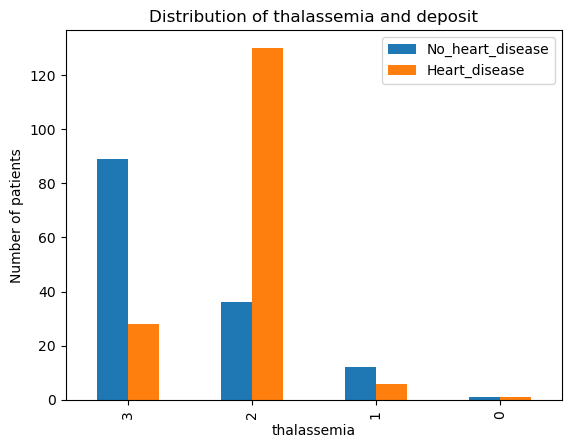

In [13]:
plot_bar('thalassemia')

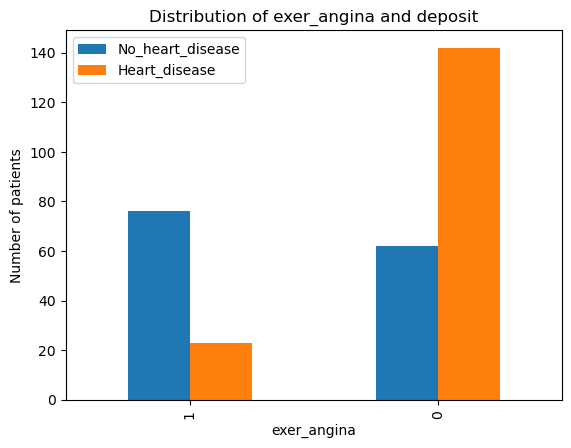

In [14]:
plot_bar('exer_angina')

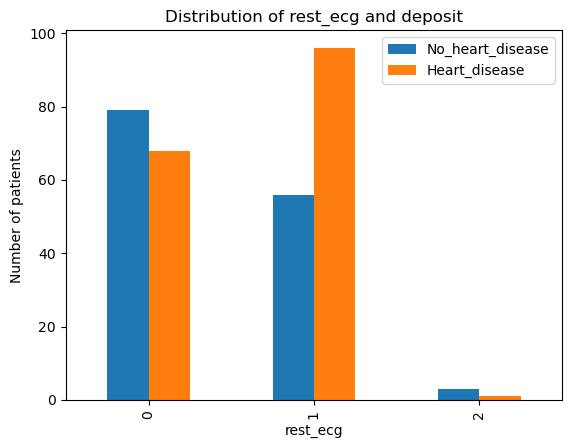

In [15]:
plot_bar('rest_ecg')

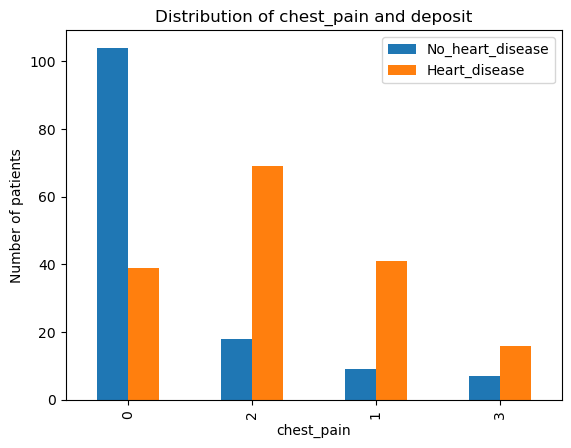

In [16]:
plot_bar('chest_pain')

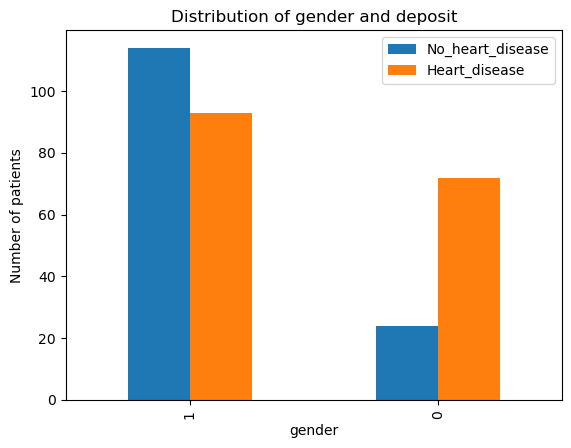

In [17]:
plot_bar("gender")

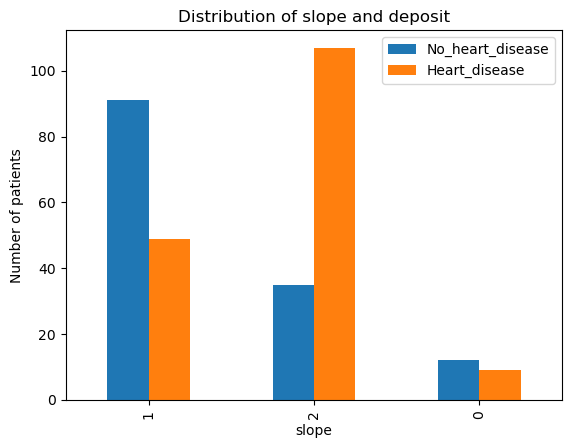

In [18]:
plot_bar('slope')

* Lower chest pain indicates lower chances of heart disease
* Greater Rest_ecg indicates lower chances of heart disease
* 

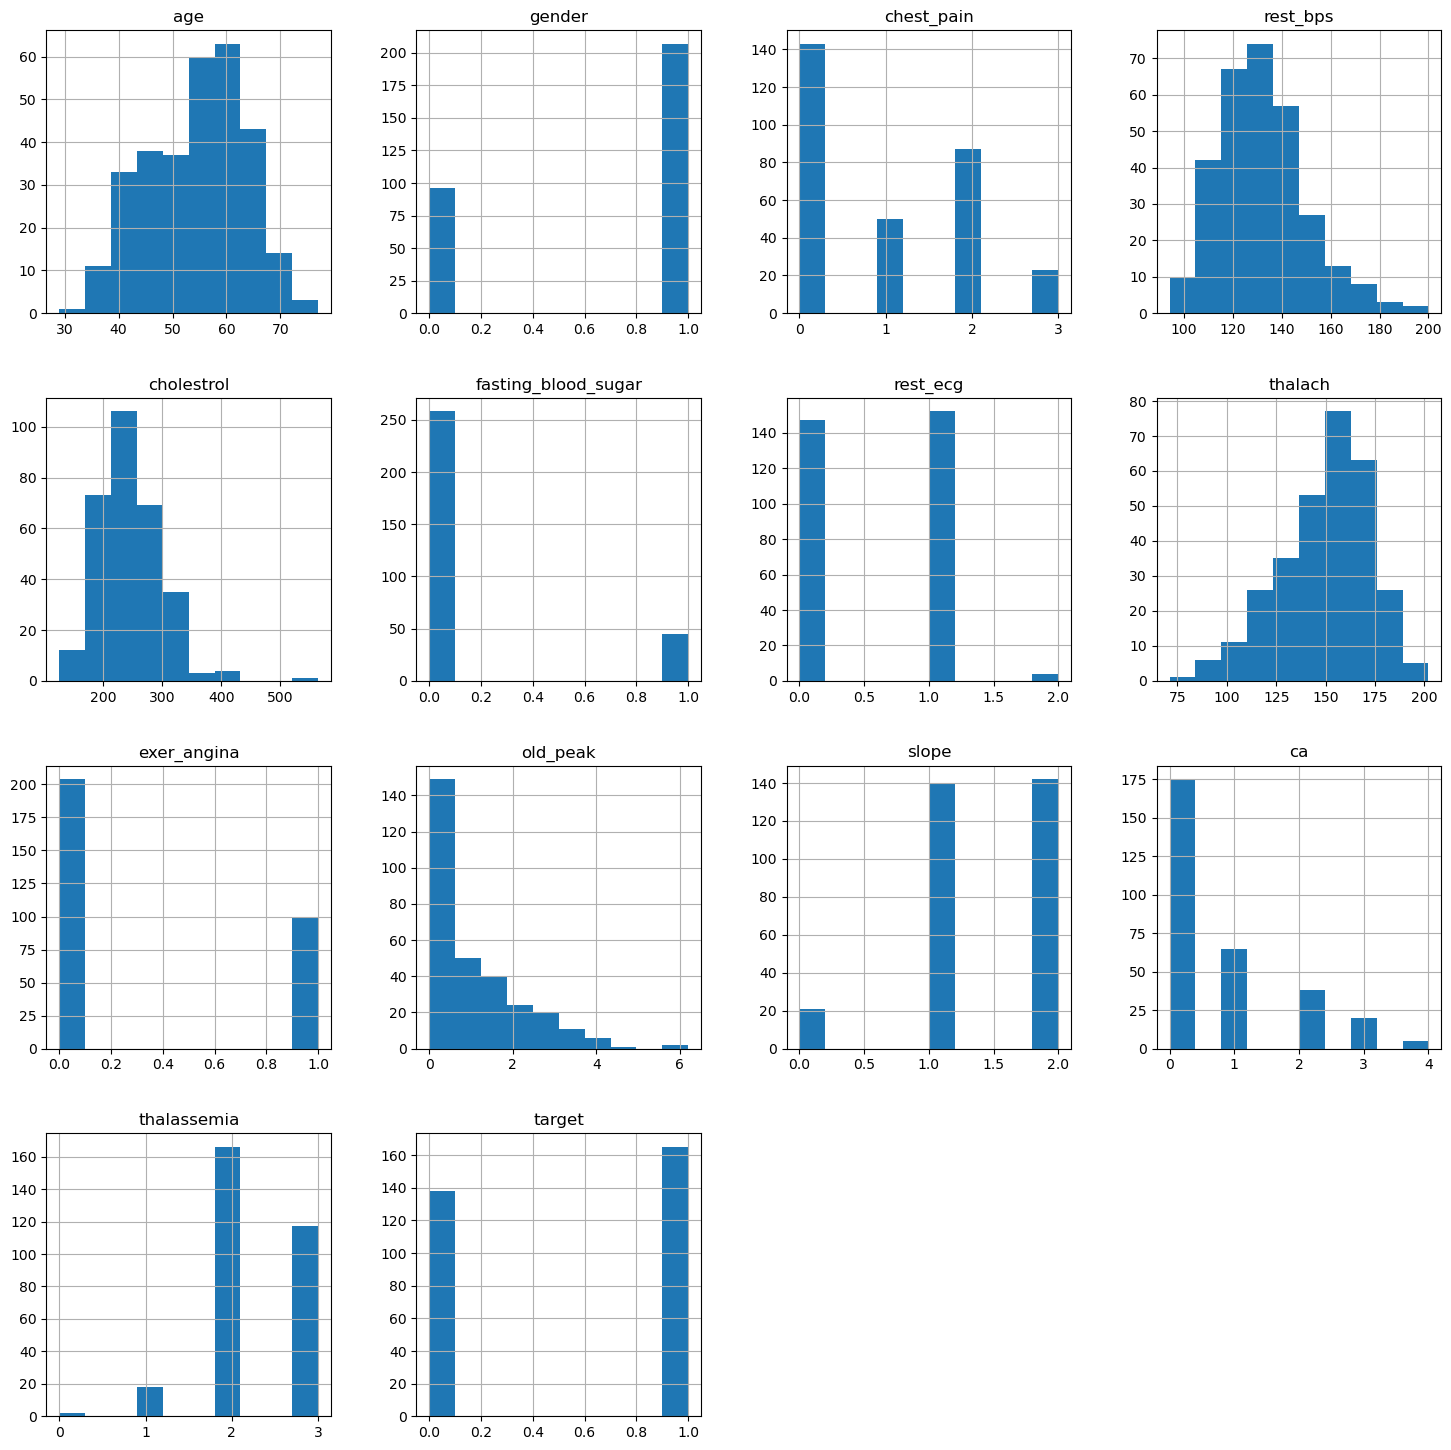

In [19]:
fig = hd_df.hist(figsize = (18,18))


<a id='Outlier_Handling'></a>
## Outlier Handling


In [20]:
hd_df.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [21]:
hd_df = hd_df.drop(hd_df[hd_df['cholestrol'] >= 500].index)

In [22]:
hd_df = hd_df.drop(hd_df[hd_df['old_peak'] >5].index)

In [23]:
hd_df.shape

(300, 14)

In [24]:
hd_df.drop_duplicates(inplace=True)

In [25]:
hd_df.shape

(299, 14)

<a id='Correlation'></a>
## 3.6 Correlation


In [26]:
# check correlation
hd_df_num = hd_df.copy()
corr = hd_df_num.corr()
corr




,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
age,1.000000,-0.085276,-0.065515,0.285895,0.197969,0.123359,-0.105303,-0.400209,0.099004,0.203677,-0.157759,0.303835,0.057332,-0.224603
gender,-0.085276,1.000000,-0.049927,-0.056232,-0.186517,0.043258,-0.073062,-0.041965,0.135196,0.121905,-0.043253,0.124498,0.223036,-0.285800
chest_pain,-0.065515,-0.049927,1.000000,0.056762,-0.107810,0.095329,0.044994,0.288795,-0.392098,-0.130807,0.107313,-0.190982,-0.158858,0.426488
rest_bps,0.285895,-0.056232,0.056762,1.000000,0.166531,0.181023,-0.115811,-0.043319,0.068580,0.177796,-0.111755,0.087395,0.059298,-0.137389
cholestrol,0.197969,-0.186517,-0.107810,0.166531,1.000000,0.018286,-0.141224,-0.020286,0.083544,0.081134,-0.002754,0.121696,0.088619,-0.116591
fasting_blood_sugar,0.123359,0.043258,0.095329,0.181023,0.018286,1.000000,-0.085099,-0.009227,0.024925,0.018025,-0.067187,0.147758,-0.028253,-0.028773
rest_ecg,-0.105303,-0.073062,0.044994,-0.115811,-0.141224,-0.085099,1.000000,0.047546,-0.078478,-0.055122,0.089466,-0.076954,-0.006410,0.138932
thalach,-0.400209,-0.041965,0.288795,-0.043319,-0.020286,-0.009227,0.047546,1.000000,-0.372599,-0.340293,0.380257,-0.233295,-0.090587,0.416096
exer_angina,0.099004,0.135196,-0.392098,0.068580,0.083544,0.024925,-0.078478,-0.372599,1.000000,0.299183,-0.258019,0.134412,0.208045,-0.435335
old_peak,0.203677,0.121905,-0.130807,0.177796,0.081134,0.018025,-0.055122,-0.340293,0.299183,1.000000,-0.555057,0.229719,0.188529,-0.428533


<Axes: >

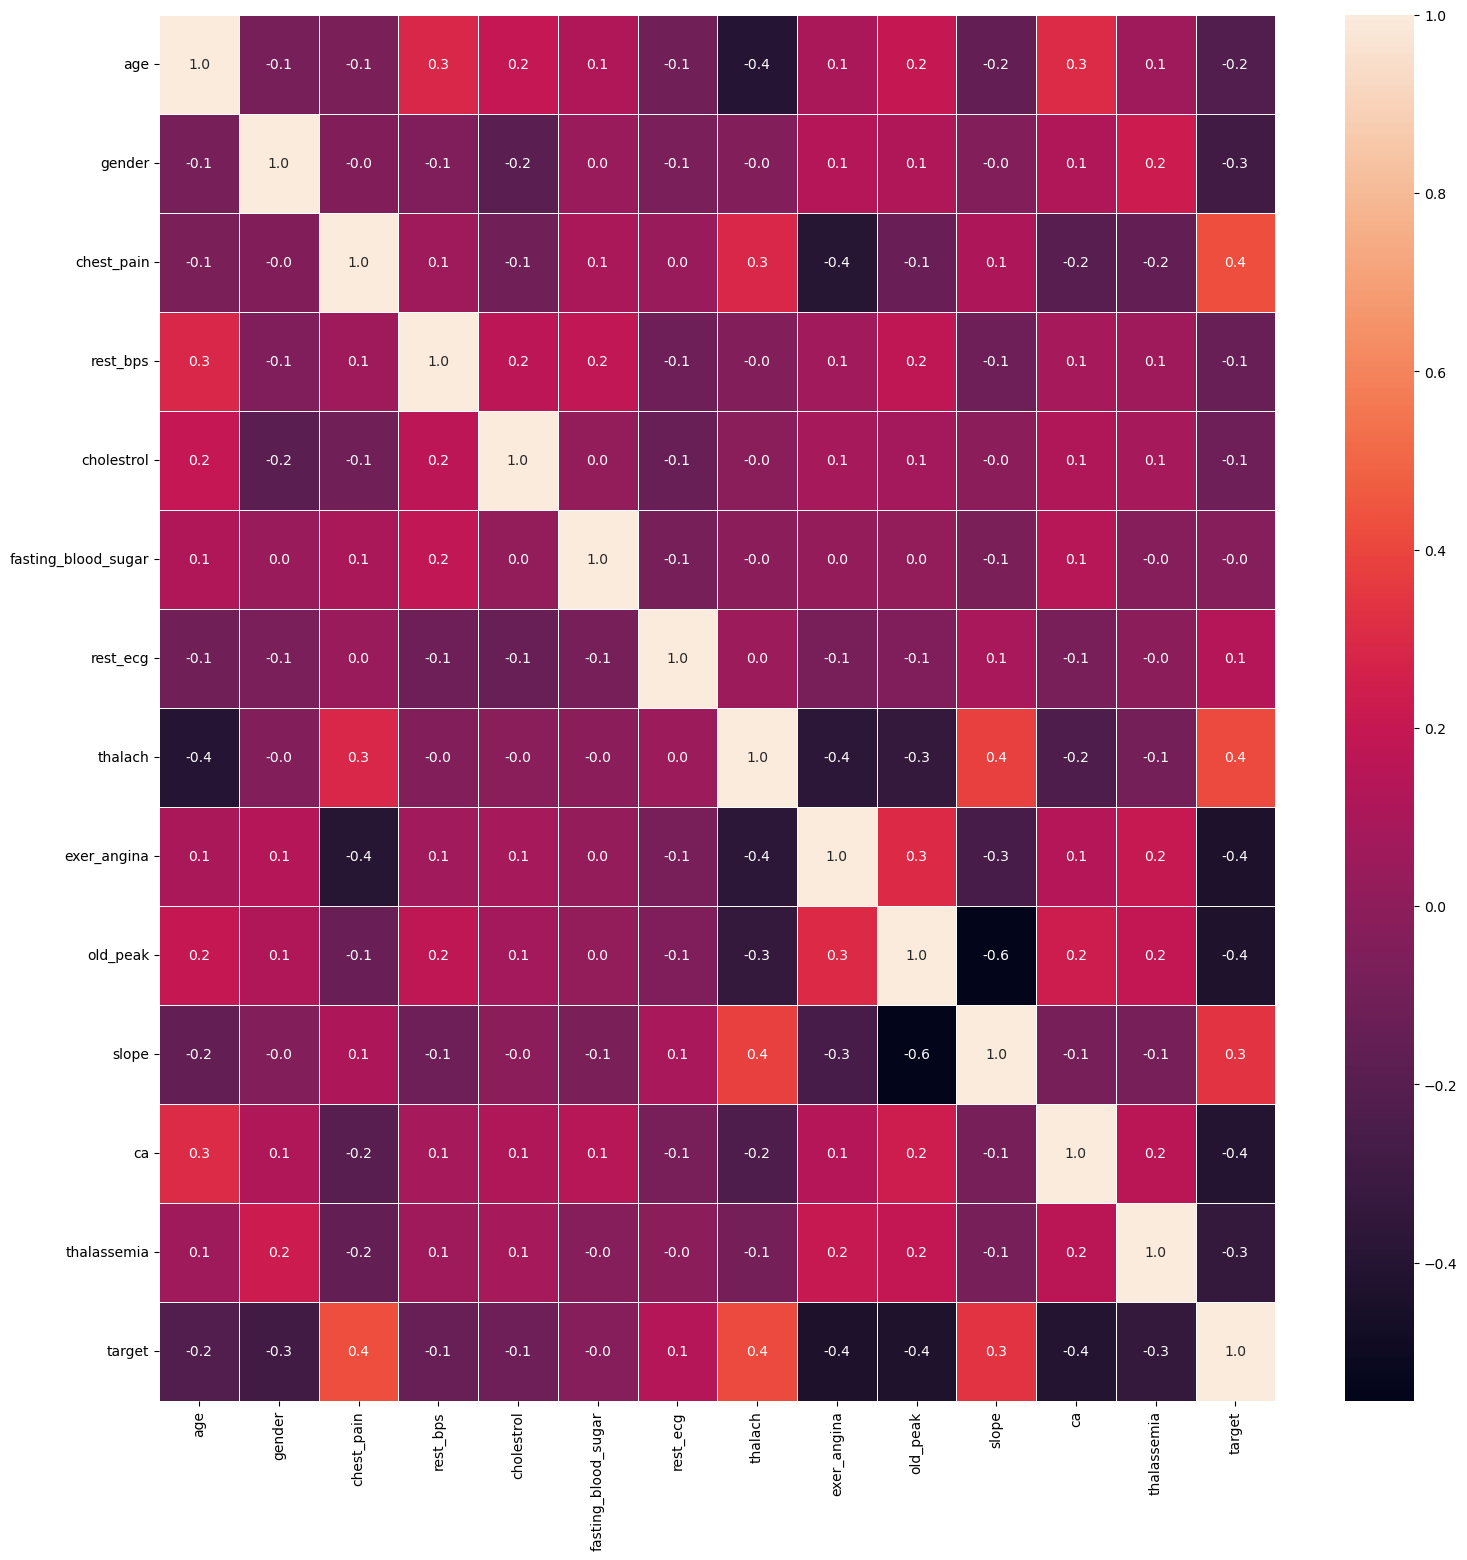

In [27]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(hd_df_num.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [28]:
hd_df.shape

(299, 14)

In [29]:
X = hd_df.iloc[:, :-1]
Y = hd_df.iloc[:,-1]

In [30]:
print(X)

     age  gender  chest_pain  rest_bps  cholestrol  fasting_blood_sugar  \
0     63       1           3       145         233                    1   
1     37       1           2       130         250                    0   
2     41       0           1       130         204                    0   
3     56       1           1       120         236                    0   
4     57       0           0       120         354                    0   
..   ...     ...         ...       ...         ...                  ...   
298   57       0           0       140         241                    0   
299   45       1           3       110         264                    0   
300   68       1           0       144         193                    1   
301   57       1           0       130         131                    0   
302   57       0           1       130         236                    0   

     rest_ecg  thalach  exer_angina  old_peak  slope  ca  thalassemia  
0           0      150     

In [31]:
print(X.shape)
print(Y.shape)

(299, 13)
(299,)


In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,age,39.09
1,gender,3.58
2,chest_pain,2.42
3,rest_bps,60.08
4,cholestrol,29.80
5,fasting_blood_sugar,1.27
6,rest_ecg,2.06
7,thalach,42.73
8,exer_angina,2.03
9,old_peak,3.03


<a id="Standardizing_Data"> </a>
## 3.10 Standardizing Data


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

In [34]:
print(X)

[[ 0.95693712  0.6771533   1.97279939 ... -2.31907529 -0.71591528
  -2.13958493]
 [-1.91979496  0.6771533   1.00262337 ... -2.31907529 -0.71591528
  -0.50343175]
 [-1.4772208  -1.47677048  0.03244736 ...  0.97500315 -0.71591528
  -0.50343175]
 ...
 [ 1.51015483  0.6771533  -0.93772866 ... -0.67203607  1.28463303
   1.13272144]
 [ 0.29307587  0.6771533  -0.93772866 ... -0.67203607  0.28435887
   1.13272144]
 [ 0.29307587 -1.47677048  0.03244736 ... -0.67203607  0.28435887
  -0.50343175]]


## Splitting the Data

In [35]:
from sklearn.model_selection import train_test_split
 
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=10)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(239, 13)
(60, 13)
(239,)
(60,)


<a id="Feature_Selection"> </a>
## Feature Selection

### Running Decision Tree Base Model

In [37]:
# predicting using decision tree classifier
from sklearn.tree import DecisionTreeClassifier

model_DT=DecisionTreeClassifier(random_state=10,criterion="gini")

# min_samples_leaf, min_samples_split, max_depth, max_features, max_leaf_nodes[pruning]

# fit the model on the data and predict the values
model_DT.fit(X_train,Y_train)
Y_pred=model_DT.predict(X_test)
#print(Y_pred)
print(list(zip(Y_test,Y_pred)))

[(1, 1), (1, 1), (1, 1), (0, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 1), (1, 0), (0, 0), (0, 0), (1, 1), (1, 0), (1, 1), (0, 0), (0, 1), (1, 0), (1, 1), (1, 1), (0, 1), (1, 1), (0, 0), (0, 0), (1, 0), (0, 1), (0, 0), (1, 0), (0, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 1), (1, 0), (1, 1), (1, 1), (1, 1), (1, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 1), (1, 1), (1, 1), (1, 1)]


In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[18 12]
 [ 7 23]]
Classification report: 
              precision    recall  f1-score   support

           0       0.72      0.60      0.65        30
           1       0.66      0.77      0.71        30

    accuracy                           0.68        60
   macro avg       0.69      0.68      0.68        60
weighted avg       0.69      0.68      0.68        60

Accuracy of the model:  0.6833333333333333


In [39]:
model_DT.score(X_train, Y_train)
# since the training accuracy and the testing accuracy are similar to each other and do not show a
# huge differance we can conclude that the decision tree is not overfitted.

1.0

In [40]:
model_DT.feature_importances_
# importane percent divide karta hai jitna time 1 variable ko use kiya hai to split the data.
# if the value is high means that variables has been used many times and vice versa.

array([0.02034331, 0.00635728, 0.06728941, 0.06120885, 0.08927164,
       0.01130184, 0.01420803, 0.05394705, 0.02421823, 0.14750328,
       0.08896835, 0.12473595, 0.29064677])

In [41]:
print((list(zip(hd_df.columns[0:-1],
               model_DT.feature_importances_))))
# summation of all importances will be equal to 1.
# those variables which show 0 or clse to 0 can be eliminated as part of feature selection process.

[('age', 0.02034331110795858), ('gender', 0.006357284721237056), ('chest_pain', 0.06728941366478608), ('rest_bps', 0.06120885324185432), ('cholestrol', 0.08927163708954333), ('fasting_blood_sugar', 0.011301839504421434), ('rest_ecg', 0.014208026805558382), ('thalach', 0.05394704964562192), ('exer_angina', 0.0242182275094745), ('old_peak', 0.14750328449063432), ('slope', 0.08896834967022227), ('ca', 0.12473594896107162), ('thalassemia', 0.2906467735876163)]


In [42]:
sample=pd.DataFrame()
 
sample["Column"]=hd_df.columns[0:-1]
sample["Imp value"]=model_DT.feature_importances_
 
sample.sort_values("Imp value",ascending=False)


,Column,Imp value
12,thalassemia,0.290647
9,old_peak,0.147503
11,ca,0.124736
4,cholestrol,0.089272
10,slope,0.088968
2,chest_pain,0.067289
3,rest_bps,0.061209
7,thalach,0.053947
8,exer_angina,0.024218
0,age,0.020343


In [43]:
hd_df.drop(["gender"],axis=1,inplace=True)
hd_df.shape

(299, 13)

In [44]:
X = hd_df.values[:,0:-1]
Y = hd_df.values[:,-1]

In [45]:
X.shape
#Y.shape

(299, 12)

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

In [47]:
print(X)

[[ 0.95693712  1.97279939  0.76888622 ... -2.31907529 -0.71591528
  -2.13958493]
 [-1.91979496  1.00262337 -0.0876599  ... -2.31907529 -0.71591528
  -0.50343175]
 [-1.4772208   0.03244736 -0.0876599  ...  0.97500315 -0.71591528
  -0.50343175]
 ...
 [ 1.51015483 -0.93772866  0.71178315 ... -0.67203607  1.28463303
   1.13272144]
 [ 0.29307587 -0.93772866 -0.0876599  ... -0.67203607  0.28435887
   1.13272144]
 [ 0.29307587  0.03244736 -0.0876599  ... -0.67203607  0.28435887
  -0.50343175]]


In [48]:
from sklearn.model_selection import train_test_split
 
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=10)

In [49]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(239, 12)
(239,)
(60, 12)
(60,)


<a id="Model_Building"> </a>
## 4 Model Building


<a id="Decision_tree"> </a>
## 4.1 Decision Tree



In [50]:
# predicting using decision tree classifier
from sklearn.tree import DecisionTreeClassifier

model_DT=DecisionTreeClassifier(random_state=10,criterion="gini")

# min_samples_leaf, min_samples_split, max_depth, max_features, max_leaf_nodes[pruning]

# fit the model on the data and predict the values
model_DT.fit(X_train,Y_train)
Y_pred=model_DT.predict(X_test)
#print(Y_pred)
print(list(zip(Y_test,Y_pred)))

[(1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 1.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (1.0, 1.0), (0.0, 1.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 1.0), (0.0, 0.0), (1.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0)]


In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[18 12]
 [ 7 23]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.72      0.60      0.65        30
         1.0       0.66      0.77      0.71        30

    accuracy                           0.68        60
   macro avg       0.69      0.68      0.68        60
weighted avg       0.69      0.68      0.68        60

Accuracy of the model:  0.6833333333333333


In [52]:
from sklearn import metrics
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names
cols = ['Model', 'Precision Score', 'Recall Score','Accuracy Score','f1-score']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
Decision_tree = pd.Series({'Model': "Decision Tree",
                     'AUC Score' : metrics.roc_auc_score(Y_test, Y_pred),
                 'Precision Score': metrics.precision_score(Y_test, Y_pred),
                 'Recall Score': metrics.recall_score(Y_test, Y_pred),
                 'Accuracy Score': metrics.accuracy_score(Y_test, Y_pred),
                  'f1-score':metrics.f1_score(Y_test, Y_pred)})



# appending our result table
result_tabulation = result_tabulation.append(Decision_tree , ignore_index = True)

# view the result table
result_tabulation

C:\Users\HELLO\AppData\Local\Temp\ipykernel_9796\2029510594.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(Decision_tree , ignore_index = True)


,Model,Precision Score,Recall Score,Accuracy Score,f1-score,AUC Score
0,Decision Tree,0.657143,0.766667,0.683333,0.707692,0.683333


<a id='Grid_Search_CV'></a>
## 4.2 Tuned Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier

model_DT=DecisionTreeClassifier( random_state=10)


parameter_space = {
    'min_samples_split':[7,9,5,11,15],       #np.arange(100, 1001,50),
    'max_depth':[10,15, 8, 12],
    'min_samples_leaf':[3,4,5,6,7]
    }
from sklearn.model_selection import GridSearchCV  #RandomizedSearchCV
clf = GridSearchCV(model_DT, parameter_space, n_jobs=-1, cv=5)
 

In [54]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=10), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 8, 12],
                         'min_samples_leaf': [3, 4, 5, 6, 7],
                         'min_samples_split': [7, 9, 5, 11, 15]})

In [55]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 5}


In [56]:
clf.best_score_        #accuracy of the best params using the 5-fold CV

0.8037234042553191

In [57]:
Y_pred=clf.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[17 13]
 [ 9 21]]
0.6333333333333333
              precision    recall  f1-score   support

         0.0       0.65      0.57      0.61        30
         1.0       0.62      0.70      0.66        30

    accuracy                           0.63        60
   macro avg       0.64      0.63      0.63        60
weighted avg       0.64      0.63      0.63        60



In [59]:
from sklearn import metrics
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names
Tuned_decision_tree = pd.Series({'Model': "Tuned_decision_tree",
                     'AUC Score' : metrics.roc_auc_score(Y_test, Y_pred),
                 'Precision Score': metrics.precision_score(Y_test, Y_pred),
                 'Recall Score': metrics.recall_score(Y_test, Y_pred),
                 'Accuracy Score': metrics.accuracy_score(Y_test, Y_pred),
                 'f1-score':metrics.f1_score(Y_test, Y_pred)})





# appending our result table
result_tabulation = result_tabulation.append(Tuned_decision_tree, ignore_index = True)

# view the result table
result_tabulation

C:\Users\HELLO\AppData\Local\Temp\ipykernel_9796\1595872956.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(Tuned_decision_tree, ignore_index = True)


,Model,Precision Score,Recall Score,Accuracy Score,f1-score,AUC Score
0,Decision Tree,0.657143,0.766667,0.683333,0.707692,0.683333
1,Tuned_decision_tree,0.617647,0.700000,0.633333,0.656250,0.633333


<a id='Logistic_regression'></a>
## 4.3 Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
# create a model
classifier=LogisticRegression()
# fitting training data to the model
classifier.fit(X_train,Y_train)

print(classifier.intercept_)  # Beta 0
print(classifier.coef_)       # beta 1

[0.07504049]
[[ 0.07685639  0.71112174 -0.4362888  -0.05419154 -0.14636857  0.28623956
   0.60602139 -0.46751798 -0.85215869  0.48290631 -0.95793895 -0.81197333]]


In [61]:
y_pred_prob=classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.1780733  0.8219267 ]
 [0.04331126 0.95668874]
 [0.23216603 0.76783397]
 [0.28880501 0.71119499]
 [0.95558779 0.04441221]
 [0.04032607 0.95967393]
 [0.10635326 0.89364674]
 [0.07467262 0.92532738]
 [0.36210689 0.63789311]
 [0.96522584 0.03477416]
 [0.90968158 0.09031842]
 [0.35854265 0.64145735]
 [0.99723824 0.00276176]
 [0.68045683 0.31954317]
 [0.9518935  0.0481065 ]
 [0.12563355 0.87436645]
 [0.1283621  0.8716379 ]
 [0.94711639 0.05288361]
 [0.05718017 0.94281983]
 [0.46938138 0.53061862]
 [0.93046668 0.06953332]
 [0.87106855 0.12893145]
 [0.94227766 0.05772234]
 [0.03980903 0.96019097]
 [0.97153694 0.02846306]
 [0.01101893 0.98898107]
 [0.41235189 0.58764811]
 [0.09227813 0.90772187]
 [0.92708232 0.07291768]
 [0.02798112 0.97201888]
 [0.04029027 0.95970973]
 [0.20780907 0.79219093]
 [0.36304939 0.63695061]
 [0.99520871 0.00479129]
 [0.88504908 0.11495092]
 [0.16065321 0.83934679]
 [0.09939325 0.90060675]
 [0.97629201 0.02370799]
 [0.94599621 0.05400379]
 [0.70021166 0.29978834]


In [62]:
Y_pred=classifier.predict(X_test)
print(Y_pred)

[1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0.]


In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[19 11]
 [ 5 25]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.79      0.63      0.70        30
         1.0       0.69      0.83      0.76        30

    accuracy                           0.73        60
   macro avg       0.74      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60

Accuracy of the model:  0.7333333333333333


In [64]:
from sklearn import metrics
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names
Logistic_regression= pd.Series({'Model': "Logistic_regression",
                     'AUC Score' : metrics.roc_auc_score(Y_test, Y_pred),
                 'Precision Score': metrics.precision_score(Y_test, Y_pred),
                 'Recall Score': metrics.recall_score(Y_test, Y_pred),
                 'Accuracy Score': metrics.accuracy_score(Y_test, Y_pred),
                 'f1-score':metrics.f1_score(Y_test, Y_pred)})





# appending our result table
result_tabulation = result_tabulation.append(Logistic_regression, ignore_index = True)

# view the result table
result_tabulation

C:\Users\HELLO\AppData\Local\Temp\ipykernel_9796\479617809.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(Logistic_regression, ignore_index = True)


,Model,Precision Score,Recall Score,Accuracy Score,f1-score,AUC Score
0,Decision Tree,0.657143,0.766667,0.683333,0.707692,0.683333
1,Tuned_decision_tree,0.617647,0.700000,0.633333,0.656250,0.633333
2,Logistic_regression,0.694444,0.833333,0.733333,0.757576,0.733333


In [65]:
result_tabulation

,Model,Precision Score,Recall Score,Accuracy Score,f1-score,AUC Score
0,Decision Tree,0.657143,0.766667,0.683333,0.707692,0.683333
1,Tuned_decision_tree,0.617647,0.700000,0.633333,0.656250,0.633333
2,Logistic_regression,0.694444,0.833333,0.733333,0.757576,0.733333


<a id='Tuned_LR'></a>
## 4.4 Tuned Logistic Regression

In [66]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.59:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0]


In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,y_pred_class))
 
acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)

[[21  9]
 [ 5 25]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.81      0.70      0.75        30
         1.0       0.74      0.83      0.78        30

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60

Accuracy of the model:  0.7666666666666667


In [68]:
Tuned_Logistic_regression= pd.Series({'Model': "Tuned_Logistic_regression",
                     'AUC Score' : metrics.roc_auc_score(Y_test, y_pred_class),
                 'Precision Score': metrics.precision_score(Y_test, y_pred_class),
                 'Recall Score': metrics.recall_score(Y_test, y_pred_class),
                 'Accuracy Score': metrics.accuracy_score(Y_test, y_pred_class),
                 'f1-score':metrics.f1_score(Y_test, y_pred_class)})
result_tabulation = result_tabulation.append(Tuned_Logistic_regression, ignore_index = True)

# view the result table
result_tabulation

C:\Users\HELLO\AppData\Local\Temp\ipykernel_9796\2425695776.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(Tuned_Logistic_regression, ignore_index = True)


,Model,Precision Score,Recall Score,Accuracy Score,f1-score,AUC Score
0,Decision Tree,0.657143,0.766667,0.683333,0.707692,0.683333
1,Tuned_decision_tree,0.617647,0.700000,0.633333,0.656250,0.633333
2,Logistic_regression,0.694444,0.833333,0.733333,0.757576,0.733333
3,Tuned_Logistic_regression,0.735294,0.833333,0.766667,0.781250,0.766667


In [69]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 17  , type 2 error : 5  , type 1 error: 12
Errors at threshold  0.41000000000000003 : 16  , type 2 error : 5  , type 1 error: 11
Errors at threshold  0.42000000000000004 : 16  , type 2 error : 5  , type 1 error: 11
Errors at threshold  0.43000000000000005 : 16  , type 2 error : 5  , type 1 error: 11
Errors at threshold  0.44000000000000006 : 16  , type 2 error : 5  , type 1 error: 11
Errors at threshold  0.45000000000000007 : 16  , type 2 error : 5  , type 1 error: 11
Errors at threshold  0.4600000000000001 : 16  , type 2 error : 5  , type 1 error: 11
Errors at threshold  0.4700000000000001 : 16  , type 2 error : 5  , type 1 error: 11
Errors at threshold  0.4800000000000001 : 16  , type 2 error : 5  , type 1 error: 11
Errors at threshold  0.4900000000000001 : 16  , type 2 error : 5  , type 1 error: 11
Errors at threshold  0.5000000000000001 : 16  , type 2 error : 5  , type 1 error: 11
Errors at threshold  0.5100000000000001 : 16  , type 2 error : 5  , type 1 

<a id='SVM'></a>
## 4.5 SVM

In [70]:
from sklearn.svm import SVC
svm= SVC(kernel="rbf", gamma=0.59, C=70,random_state=10)
svm.fit(X_train, Y_train) # fit the model
Y_pred= svm.predict(X_test) # then predict on the test set
accuracy= accuracy_score(Y_test, Y_pred) 
clf_report= classification_report(Y_test, Y_pred) 
print(confusion_matrix(Y_test,Y_pred))
print("The accuracy of the ",type(svm).__name__, " model is ", accuracy*100 )
print("Classification report:\n", clf_report)
print("\n")

[[19 11]
 [11 19]]
The accuracy of the  SVC  model is  63.33333333333333
Classification report:
               precision    recall  f1-score   support

         0.0       0.63      0.63      0.63        30
         1.0       0.63      0.63      0.63        30

    accuracy                           0.63        60
   macro avg       0.63      0.63      0.63        60
weighted avg       0.63      0.63      0.63        60





In [71]:
SVC = pd.Series({'Model': "SVC",
                     'AUC Score' : metrics.roc_auc_score(Y_test, Y_pred),
                 'Precision Score': metrics.precision_score(Y_test, Y_pred),
                 'Recall Score': metrics.recall_score(Y_test, Y_pred),
                 'Accuracy Score': metrics.accuracy_score(Y_test, Y_pred),
                 'f1-score':metrics.f1_score(Y_test, Y_pred)})





# appending our result table
result_tabulation = result_tabulation.append(SVC, ignore_index = True)

# view the result table
result_tabulation

C:\Users\HELLO\AppData\Local\Temp\ipykernel_9796\1358906859.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(SVC, ignore_index = True)


,Model,Precision Score,Recall Score,Accuracy Score,f1-score,AUC Score
0,Decision Tree,0.657143,0.766667,0.683333,0.707692,0.683333
1,Tuned_decision_tree,0.617647,0.700000,0.633333,0.656250,0.633333
2,Logistic_regression,0.694444,0.833333,0.733333,0.757576,0.733333
3,Tuned_Logistic_regression,0.735294,0.833333,0.766667,0.781250,0.766667
4,SVC,0.633333,0.633333,0.633333,0.633333,0.633333


<a id='Model_comparision'></a>
## Model Comparision

In [72]:
result_tabulation

,Model,Precision Score,Recall Score,Accuracy Score,f1-score,AUC Score
0,Decision Tree,0.657143,0.766667,0.683333,0.707692,0.683333
1,Tuned_decision_tree,0.617647,0.700000,0.633333,0.656250,0.633333
2,Logistic_regression,0.694444,0.833333,0.733333,0.757576,0.733333
3,Tuned_Logistic_regression,0.735294,0.833333,0.766667,0.781250,0.766667
4,SVC,0.633333,0.633333,0.633333,0.633333,0.633333


* Tuned Logistic Regression is giving good accuracy as well as better recall for both classes so that model should be used for any future predictions.